<a href="https://www.kaggle.com/code/bethgitau/credit-analysis?scriptVersionId=233434902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **CREDIT ANALYSIS**
# Credit Information
Using Kaggle's Home Credit Default Risk competition, we will practice setting our own tasks and analyzing data close to real life.

# 1. Understanding the content of the competition
From the competition overview page and the "Home Credit Default Risk" competition follows the these perspectives:

1. What kind of company is Home Credit?

Home Credit is a financial services company focused on expanding financial inclusion, particularly for people with limited or no credit history—often referred to as the unbanked or underbanked population. The company aims to provide safe and positive borrowing experiences for these individuals. It uses alternative data sources such as telecommunications data and transactional behavior to assess a person's creditworthiness. Home Credit’s mission is to empower clients through responsible lending, rather than excluding them from financial systems or exposing them to predatory lenders.
3. What do we predict for this competition?
This is a machine learning competition hosted on Kaggle, where participants are challenged to unlock the full potential of their data by:
- Build predictive models that determine the likelihood of a loan applicant defaulting on a loan.
- Use complex, multi-source data (including both structured and unstructured features like client demographics, payment history, previous credit, and alternative data).
- The goal is to improve Home Credit’s current systems by enhancing the accuracy and reliability of their credit risk assessments.
- Participants must predict the target variable, which is a binary indicator of whether a client defaulted on the loan (1 = defaulted, 0 = repaid).
3. What benefits can companies gain from predicting this?

Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. This will bendefit the companies in reducing risk exposure, impprove financial inclusion, optimize lending terms, boost profitability and build trust and reputation.

# Preparing the dataset
The dataset to be analyzed is the application_train.csv downloaded from the competition Data page. The train dataset has target, contains static data for all applications and one row represents one loan in the data sample.

# 2.Understanding the overview of the data
To get an overview of the data, we will first load the data and carry out the following steps:
- .head()Using , .info(), etc.describe()
- Check for missing values
- Draw a graph showing class ratios
- Provide an explanation and discussion of each result.

In [1]:
# Import the libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Load Data
application_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
# 1. Preview the data
application_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


This provides the first five rows of the dataset. We can already see the column names, their data types and understand their structures. This gives a sense of both categorical (Target) and numerical features that we can work with.

In [3]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Shows the total 307,511 rows, 122 variables, column data types and non-null counts. Useful to spot missing values and distunguish between object, int and float types.

In [4]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Provides count, mean, std, min, max, and percentiles for numerical columns only. This helps spot Extreme values (outliers),Skewed distributions (e.g., if AMT_INCOME_TOTAL has very large max) and Data ranges and central tendency (mean, median).

In [5]:
# 2. Check for missing values
missing = application_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_ratio = (missing / len(application_train))

# Display top 10
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing Ratio': missing_ratio})
missing_df.head(10)

,Missing Values,Missing Ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


This shows the top ten columns having over 68% of the missing data. This might mean that most clients do not live in or report on apartments with common areas, non-living apartments and living apartments. We notice that most columns have AVG, MODE, MEDI of the same groups which shows high correlation hence redundant.

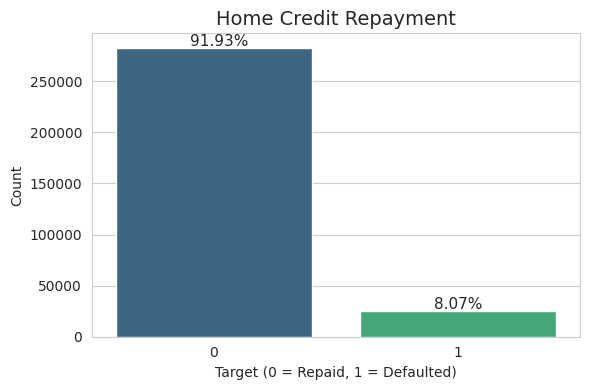

In [6]:
# 3. Draw a graph showing class ratios
sns.set_style('whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=application_train, palette='viridis')
plt.title('Home Credit Repayment', fontsize=14)
plt.xlabel('Target (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Count')

# Add percentages
total = len(application_train)
for p in plt.gca().patches:
    plt.text(p.get_x() + 0.3, p.get_height() + 2000, f'{100 * p.get_height() / total:.2f}%', fontsize=11)

plt.tight_layout()
plt.show()

The class ratios plot is imbalanced showing most loans (92%) are already repaid. This is pretty good for the home credit company since the default numbers are quite small.

# 3.Setting the problem
Based on the overview of the data, we will set our own issues and questions.
- Drop columns with over 70% missing values
- Correlation with target
- Visualizing using barplot and heatmap 

In [7]:
# 1. Drop columns with over 70% missing values
high_missing_cols = missing_ratio[missing_ratio > 0.70].index.tolist()

application_train_cleaned = application_train.drop(columns=high_missing_cols)

# Keep only numeric columns
numeric_df = application_train_cleaned.select_dtypes(include='number')

In [8]:
# 2.. Correlation
correlations = numeric_df.corr()['TARGET'].sort_values(key=abs, ascending=False)
correlations.head(10)

TARGET                         1.000000
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

In [9]:
# Now calculate correlations with the target
correlations = numeric_df.corr()['TARGET'].sort_values(key=abs, ascending=False)
positive_corr = correlations[correlations > 0].drop('TARGET').sort_values(ascending=False)
negative_corr = correlations[correlations < 0].drop('TARGET', errors='ignore').sort_values()
# Show top 10 features most correlated with TARGET
print(positive_corr.head(10))
print(negative_corr.head(10))

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


Strongest predictors of non-default:

Positive Correlation
- DAYS_BIRTH has a correlation of 0.0782. Younger applicants are more likely to default (more days since birth = older = less risky).
- REGION_RATING_CLIENT_W_CITY has a correlation of 0.0609.	Lower regional rating means higher risk (inversely encoded, likely 1=worst, 3=best).
- REGION_RATING_CLIENT	has a correlation of 0.0589. Region’s socioeconomic rating — lower score means more default risk.

Negative Correlation
- EXT_SOURCE_3	has a correlation of -0.1789. A strong external credit score; higher score = less likely to default.
- EXT_SOURCE_2 has a correlation of	-0.1605. Another external score; same pattern — more reliable borrower.
- EXT_SOURCE_1	has a correlation of -0.1553. Yet another external credit risk rating.

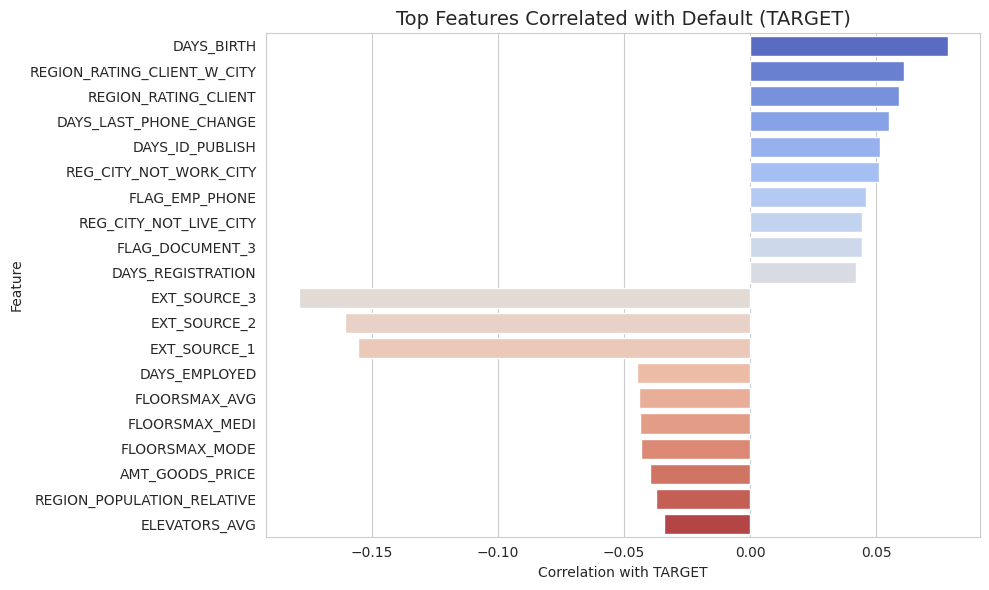

In [10]:
# 3. Visualization
# Combine top positive and negative correlations
top_positive = positive_corr.head(10)
top_negative = negative_corr.head(10)

# Concatenate them for visualization
top_corr_combined = pd.concat([top_positive, top_negative])

# Plot the top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_combined.values, y=top_corr_combined.index, palette='coolwarm')
plt.title('Top Features Correlated with Default (TARGET)', fontsize=14)
plt.xlabel('Correlation with TARGET')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


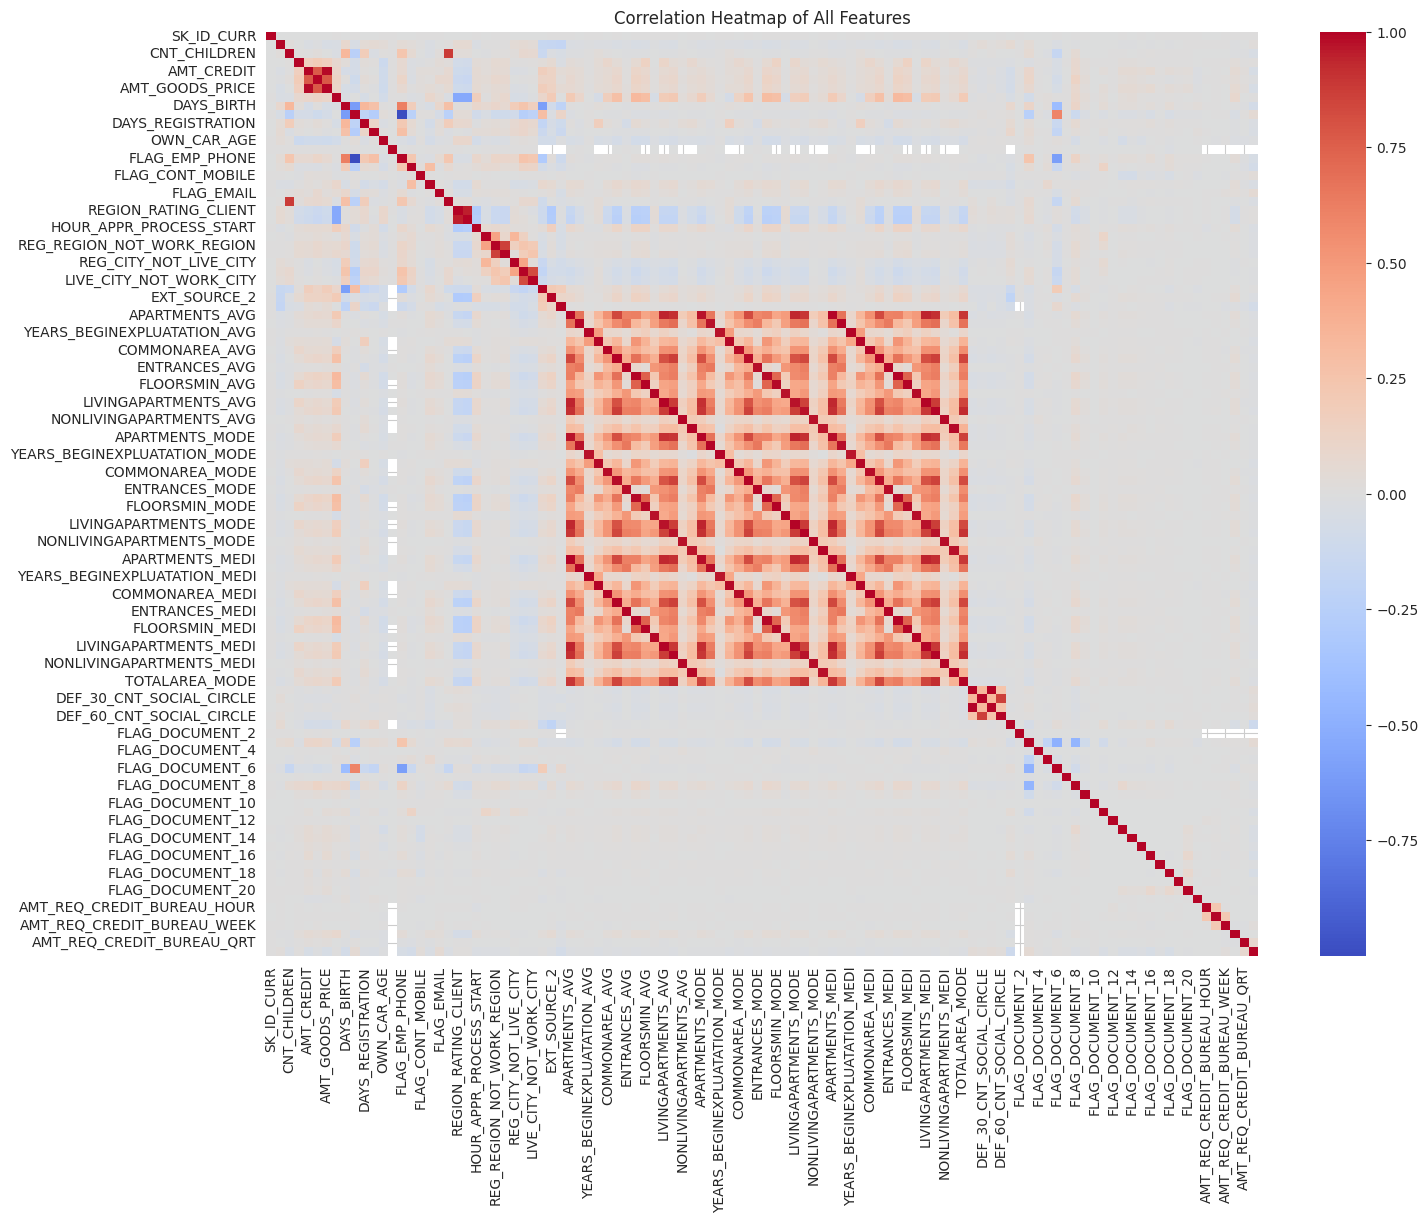

In [11]:
# Visualization using heatmap for the overall matrix
corr_matrix = numeric_df.corr(numeric_only=True)
# Create a heatmap to find relationships with high correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


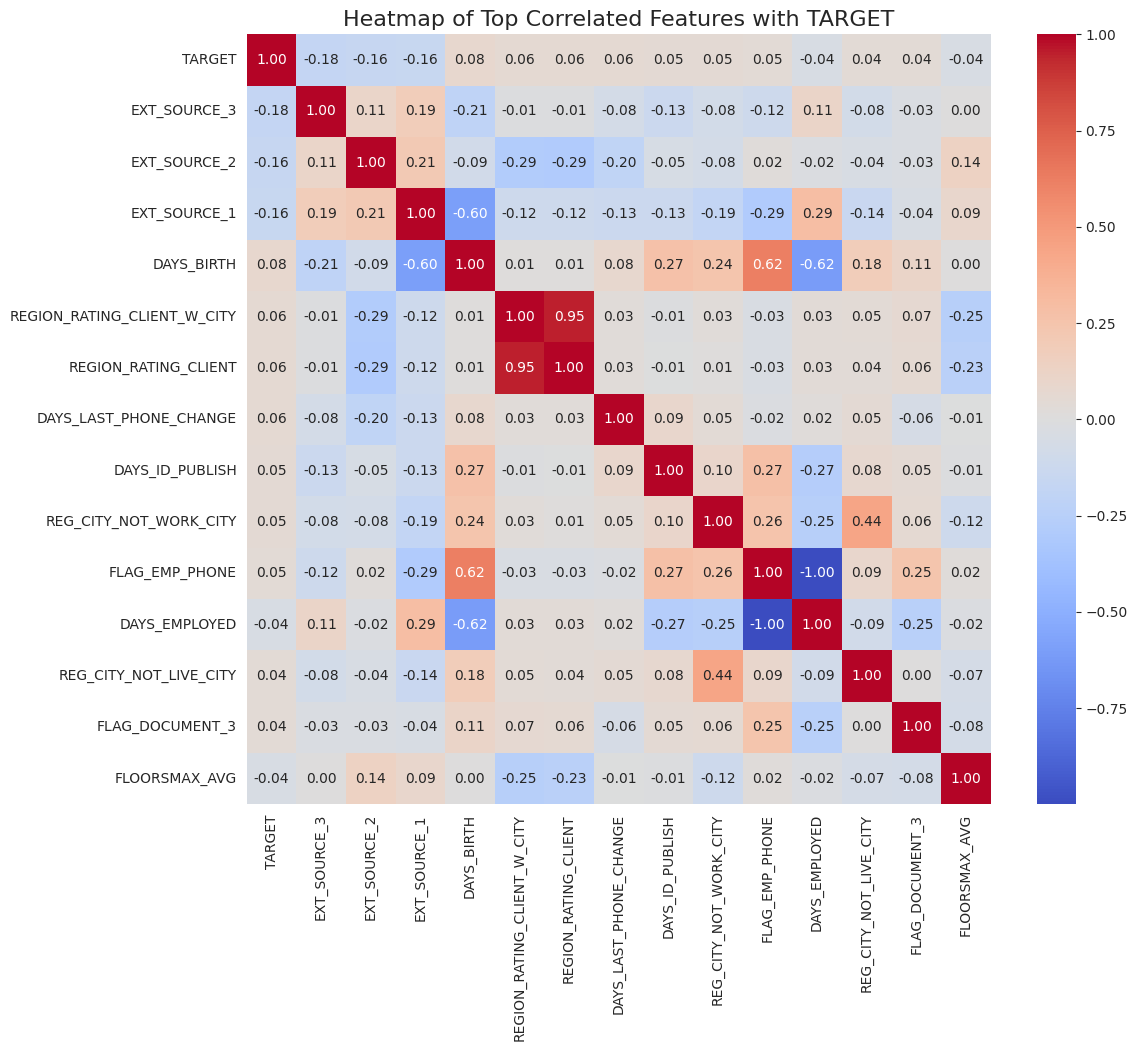

In [12]:
# Sort features based on correlation with TARGET
target_corr = corr_matrix['TARGET'].sort_values(key=abs, ascending=False)

# Select top 15 most correlated features (including TARGET itself)
top_corr_features = target_corr.head(15).index

# Draw a heatmap of just those
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df[top_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap of Top Correlated Features with TARGET', fontsize=16)
plt.show()

Stronger correlations will appear in darker shades (either dark blue or red depending on the direction). Strong positive correlations have dark red while strong negative correlations have dark blue. The TARGET column will shows the most correlated features and how each feature influences the likelihood of default.

# 4. Data exploration
We will explore the relationships and trends data to solve the problem or question set in Problem 3. 

We will create at least five tables and graphs to use in our exploration, along with our explanations.
- Which features are different between defaulters and repayers?
- Does income or credit amount influence default rate?
- How does age or employment length relate to default?
- Are some education types or occupations more likely to default?

# Explolation 1: Default Rate by Gender


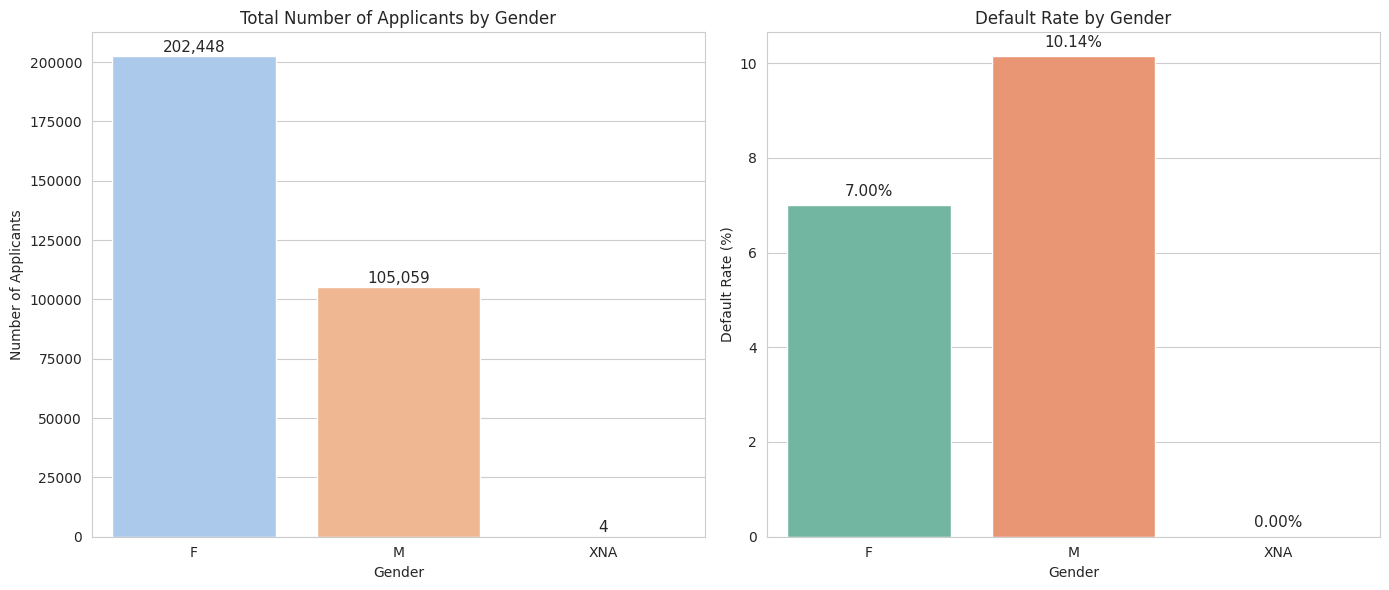

In [13]:
# Group data for total applications and default rates by gender
gender_total = application_train['CODE_GENDER'].value_counts().reset_index()
gender_total.columns = ['Gender', 'Count']

gender_stats = application_train.groupby('CODE_GENDER')['TARGET'].agg(['count', 'sum']).reset_index()
gender_stats.columns = ['Gender', 'Total', 'Defaults']
gender_stats['Default Rate (%)'] = 100 * gender_stats['Defaults'] / gender_stats['Total']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Barplot: Total number of males and females
sns.barplot(x='Gender', y='Count', data=gender_total, palette='pastel', ax=axes[0])
axes[0].set_title('Total Number of Applicants by Gender')
axes[0].set_ylabel('Number of Applicants')
axes[0].set_xlabel('Gender')

# Annotate bars
for i, row in gender_total.iterrows():
    axes[0].text(i, row['Count'] + 2000, f"{row['Count']:,}", ha='center', fontsize=11)

# 2. Barplot: Default rate by gender
sns.barplot(x='Gender', y='Default Rate (%)', data=gender_stats, palette='Set2', ax=axes[1])
axes[1].set_title('Default Rate by Gender')
axes[1].set_ylabel('Default Rate (%)')
axes[1].set_xlabel('Gender')

# Annotate bars
for i, row in gender_stats.iterrows():
    axes[1].text(i, row['Default Rate (%)'] + 0.2, f"{row['Default Rate (%)']:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

The number of females is nearly double the number of males but the males are more likely to default (10%) compared to the female counterparts (7%).

# Exploration 2: Default Rate vs Income

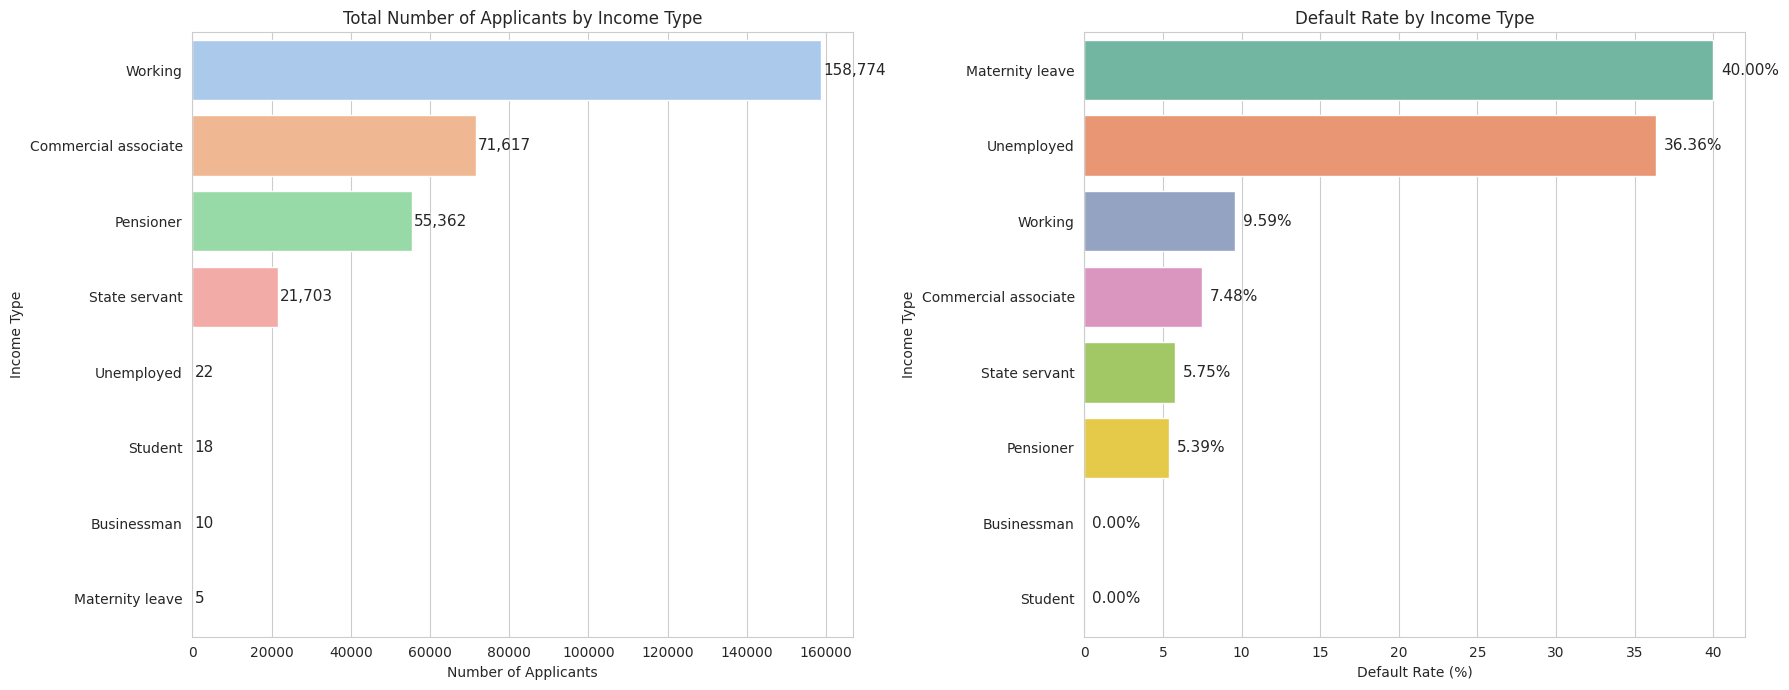

In [14]:
# Group by Income Type
income_total = application_train['NAME_INCOME_TYPE'].value_counts().reset_index()
income_total.columns = ['Income Type', 'Total Applicants']

income_stats = application_train.groupby('NAME_INCOME_TYPE')['TARGET'].agg(['count', 'sum']).reset_index()
income_stats.columns = ['Income Type', 'Total', 'Defaults']
income_stats['Default Rate (%)'] = 100 * income_stats['Defaults'] / income_stats['Total']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Plot: Total number of applicants by income type
sns.barplot(x='Total Applicants', y='Income Type', data=income_total, palette='pastel', ax=axes[0])
axes[0].set_title('Total Number of Applicants by Income Type')
axes[0].set_xlabel('Number of Applicants')
axes[0].set_ylabel('Income Type')

# Annotate bars
for i, row in income_total.iterrows():
    axes[0].text(row['Total Applicants'] + 500, i, f"{row['Total Applicants']:,}", va='center', fontsize=11)

# 2. Plot: Default Rate by income type
sns.barplot(x='Default Rate (%)', y='Income Type', data=income_stats.sort_values('Default Rate (%)', ascending=False),
            palette='Set2', ax=axes[1])
axes[1].set_title('Default Rate by Income Type')
axes[1].set_xlabel('Default Rate (%)')
axes[1].set_ylabel('Income Type')

# Annotate bars
for bar in axes[1].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[1].text(width + 0.5, y, f'{width:.2f}%', va='center', fontsize=11)

plt.tight_layout()
plt.show()

Income earners from Working, followed by Commercial associate, Pensioner and State servant are the most loan applicants.

Applicants with the type of income: Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed at 37%. The remaining income types are under the average of 10% for not returning loans.

# Exploration 3: Default Rate vs Education Level

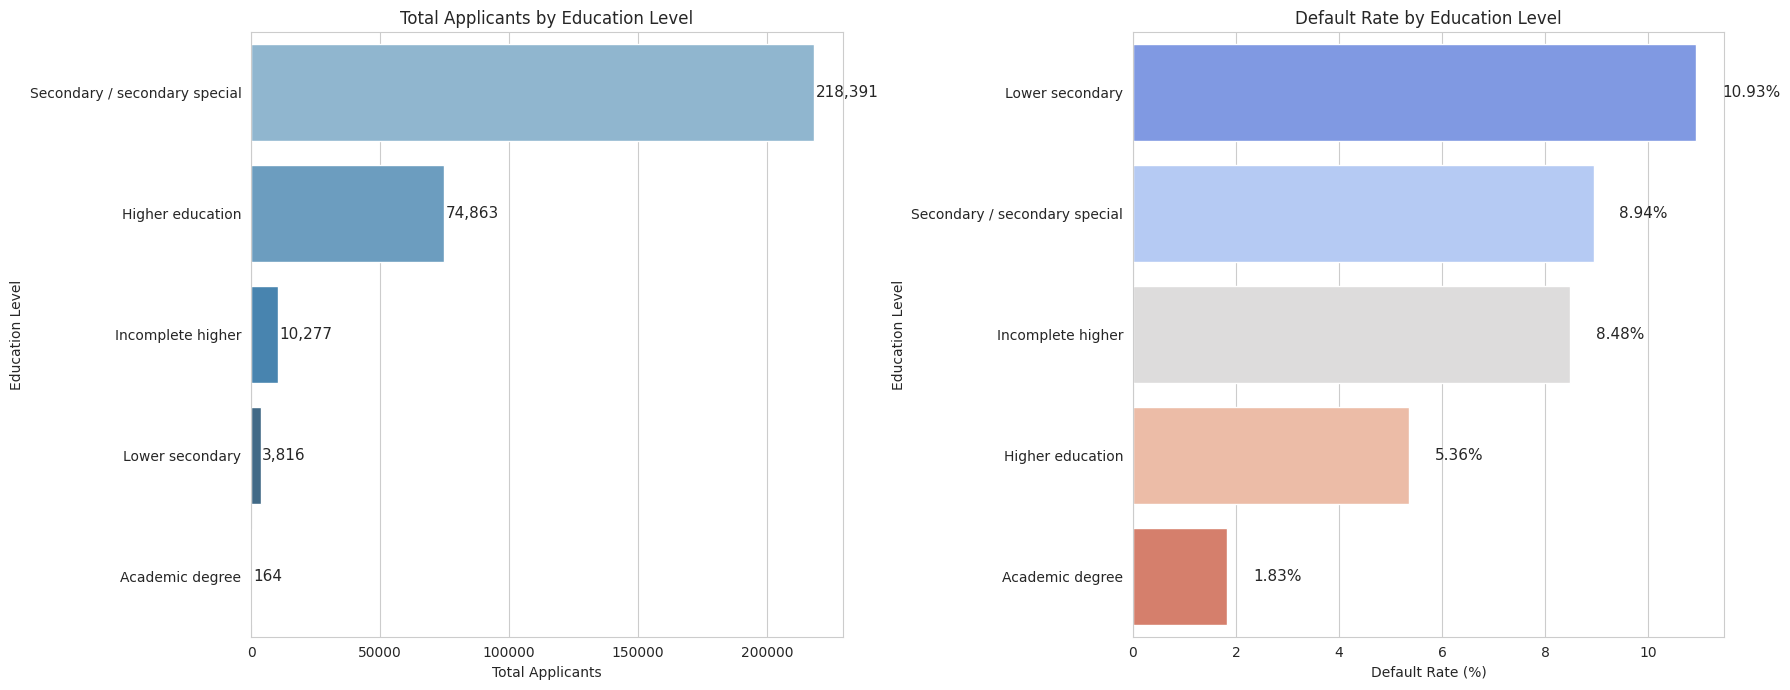

In [15]:
# Count and default stats by education level
education_stats = application_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['count', 'sum']).reset_index()
education_stats.columns = ['Education Level', 'Total', 'Defaults']
education_stats['Default Rate (%)'] = 100 * education_stats['Defaults'] / education_stats['Total']
education_total = application_train['NAME_EDUCATION_TYPE'].value_counts().reset_index()
education_total.columns = ['Education Level', 'Total Applicants']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Total applicants
sns.barplot(x='Total Applicants', y='Education Level', data=education_total, palette='Blues_d', ax=axes[0])
axes[0].set_title('Total Applicants by Education Level')
axes[0].set_xlabel('Total Applicants')

for bar in axes[0].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[0].text(width + 500, y, f'{int(width):,}', va='center', fontsize=11)

# 2. Default rate
sorted_edu = education_stats.sort_values('Default Rate (%)', ascending=False)
sns.barplot(x='Default Rate (%)', y='Education Level', data=sorted_edu, palette='coolwarm', ax=axes[1])
axes[1].set_title('Default Rate by Education Level')
axes[1].set_xlabel('Default Rate (%)')

for bar in axes[1].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[1].text(width + 0.5, y, f'{width:.2f}%', va='center', fontsize=11)

plt.tight_layout()
plt.show()

Most clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree. Lower secondary has lower count but have the largest deafulting rate of 11%. Academic degree people have less than 2% defaulting rate.

# Exploration 4: Default Rate by Age Group

/tmp/ipykernel_13/295350200.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = application_train.groupby('AGE_GROUP')['TARGET'].agg(['count', 'sum']).reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

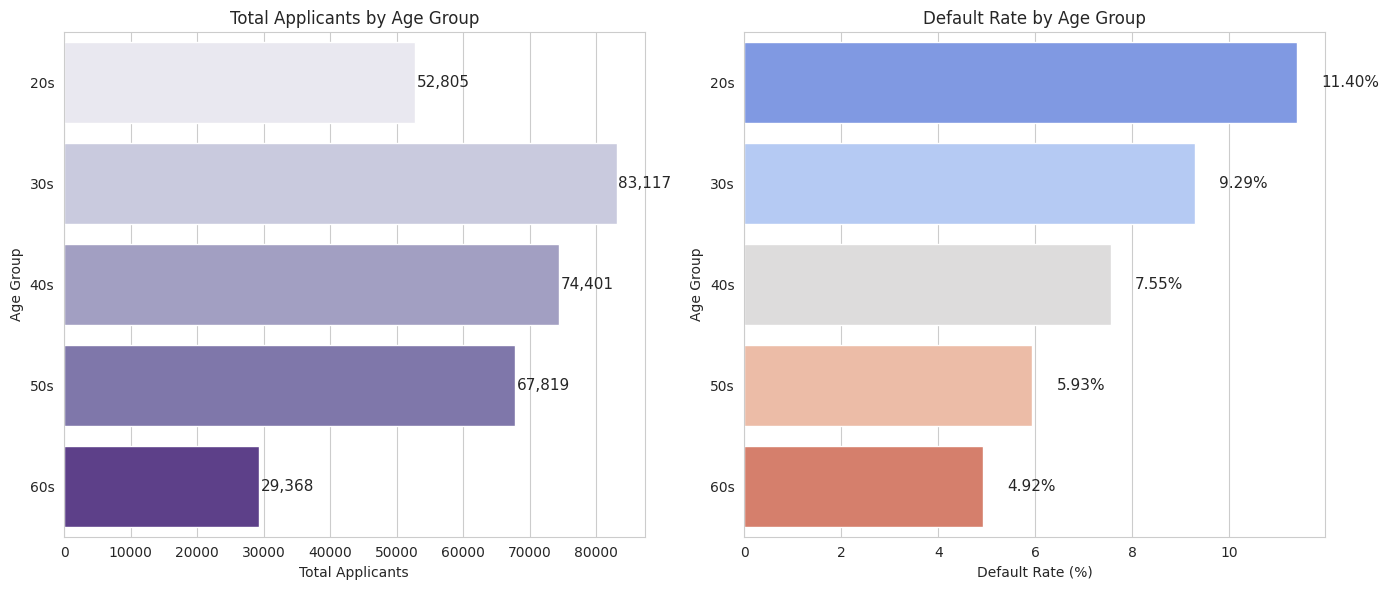

In [16]:
# Create Age feature from DAYS_BIRTH
application_train['AGE_YEARS'] = (-application_train['DAYS_BIRTH']) // 365
application_train['AGE_GROUP'] = pd.cut(application_train['AGE_YEARS'],
                                        bins=[20, 30, 40, 50, 60, 70],
                                        labels=['20s', '30s', '40s', '50s', '60s'])

# Count and default rate by age group
age_stats = application_train.groupby('AGE_GROUP')['TARGET'].agg(['count', 'sum']).reset_index()
age_stats.columns = ['Age Group', 'Total', 'Defaults']
age_stats['Default Rate (%)'] = 100 * age_stats['Defaults'] / age_stats['Total']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Total applicants
sns.barplot(x='Total', y='Age Group', data=age_stats, palette='Purples', ax=axes[0])
axes[0].set_title('Total Applicants by Age Group')
axes[0].set_xlabel('Total Applicants')

for bar in axes[0].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[0].text(width + 200, y, f'{int(width):,}', va='center', fontsize=11)

# 2. Default rate
sns.barplot(x='Default Rate (%)', y='Age Group', data=age_stats, palette='coolwarm', ax=axes[1])
axes[1].set_title('Default Rate by Age Group')
axes[1].set_xlabel('Default Rate (%)')

for bar in axes[1].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[1].text(width + 0.5, y, f'{width:.2f}%', va='center', fontsize=11)

plt.tight_layout()
plt.show()

Most clients are in their 30s, followed by 40s. The 60s age group has the lowest representation of loan applicants. With 20s has lower count besides the 60s age-group, they have the largest defaulting rate of 11%. 60s age-group have the lowest defaulting rate at 5%.

# Exploration 5: Default Rate by Occupation Type

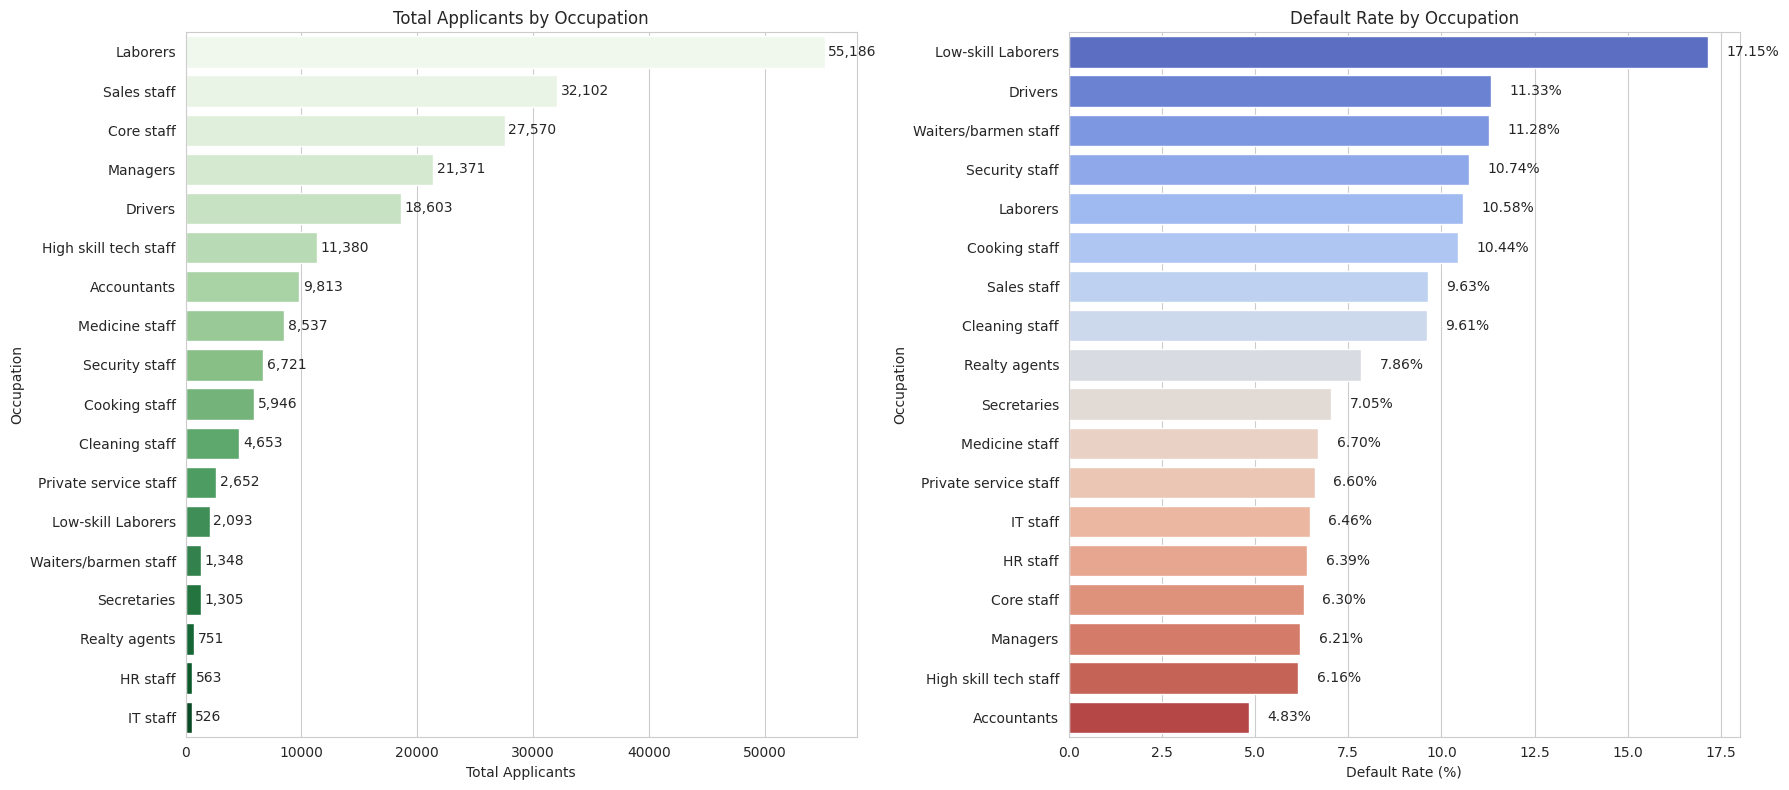

In [17]:
# Drop missing occupation entries
occupation_data = application_train.dropna(subset=['OCCUPATION_TYPE'])

# Count and default rate by occupation
occ_stats = occupation_data.groupby('OCCUPATION_TYPE')['TARGET'].agg(['count', 'sum']).reset_index()
occ_stats.columns = ['Occupation', 'Total', 'Defaults']
occ_stats['Default Rate (%)'] = 100 * occ_stats['Defaults'] / occ_stats['Total']

# Sort for plotting
occ_stats_sorted = occ_stats.sort_values('Total', ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Total applicants
sns.barplot(x='Total', y='Occupation', data=occ_stats_sorted, palette='Greens', ax=axes[0])
axes[0].set_title('Total Applicants by Occupation')
axes[0].set_xlabel('Total Applicants')

for bar in axes[0].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[0].text(width + 300, y, f'{int(width):,}', va='center', fontsize=10)

# 2. Default rate
occ_stats_sorted_rate = occ_stats.sort_values('Default Rate (%)', ascending=False)
sns.barplot(x='Default Rate (%)', y='Occupation', data=occ_stats_sorted_rate, palette='coolwarm', ax=axes[1])
axes[1].set_title('Default Rate by Occupation')
axes[1].set_xlabel('Default Rate (%)')

for bar in axes[1].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    axes[1].text(width + 0.5, y, f'{width:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

Low-skill Laborers have the highest defaulting percentage of over 17%, followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

# Summary of Exploratory Data Analysis (EDA)
Our analysis of the Home Credit Default Risk dataset reveals meaningful patterns across demographic and socioeconomic variables. Gender-based analysis showed that while females constitute a slightly smaller portion of the applicant pool, they tend to have a slightly lower default rate than males, suggesting potential gender-related risk differences. When analyzing income levels, we found that applicants with lower income are more likely to default, reinforcing the importance of income as a creditworthiness indicator. The education-level analysis showed that individuals with lower educational attainment, particularly those with only secondary or vocational education, have higher default rates, potentially reflecting financial literacy challenges. Age-wise, younger applicants—particularly those in their 20s and 30s—showed higher default probabilities, highlighting risk in younger borrower segments. Lastly, occupation type exposed notable variance in risk: groups like Laborers and Drivers showed higher default rates, while more stable professions like Managers and Accountants had lower risk, likely due to income stability and job security.

Together, these insights can inform better risk modeling, targeted lending strategies, and personalized loan structures that promote both financial inclusion and portfolio resilience.